In [36]:
import os
from glob import glob
from PIL import Image

import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img, array_to_img # 이미지 분류
import tensorflow as tf


import warnings
warnings.simplefilter('ignore')

## 1. 모델읽기

In [38]:
from sklearn.externals import joblib

In [39]:
mymodel = joblib.load('dress.pkl')

## 2. 다른 이미지 확인해보기

In [105]:
data_paths = glob('image/*.jpg')

In [106]:
data_paths

['image/image_2.jpg',
 'image/image_3.jpg',
 'image/image_1.jpg',
 'image/image_4.jpg',
 'image/image_34.jpg']

In [107]:
path = data_paths[3]
path

'image/image_4.jpg'

In [108]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [109]:
image.shape

(225, 225, 3)

### 2-1 모델에 학습한 shape과 맞춰주기

In [110]:
import cv2

In [111]:
image = cv2.resize(image, (100,100))
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [112]:
test_image = image[:,:,0]
test_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [113]:
test_image.reshape(1,-1).size

10000

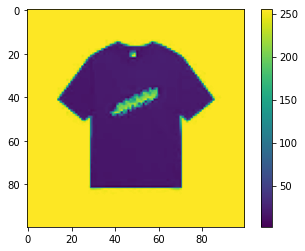

In [116]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test_image)
plt.colorbar()
plt.show()

In [115]:
mymodel.predict(test_image.reshape(1,-1))

array([8], dtype=uint8)